# Alucar - analisando as vendas

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
alucar = pd.read_csv('data/alucar.csv')

In [3]:
alucar.shape

(24, 2)

In [4]:
alucar.isnull().sum()

mes       0
vendas    0
dtype: int64

In [5]:
# Como é um trabalho em cima de séries temporais a variável mês tem que se do tipo TIME
alucar['mes'] = pd.to_datetime(alucar.mes)

In [6]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [7]:
print(sns.__version__)

0.12.2


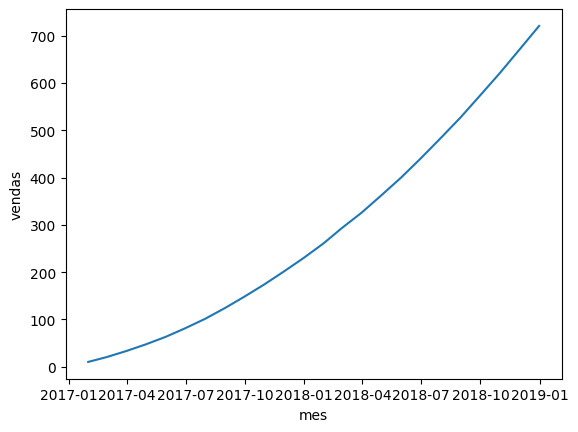

In [8]:
sns.lineplot(x='mes', y='vendas', data=alucar);

Melhorando o gráfico


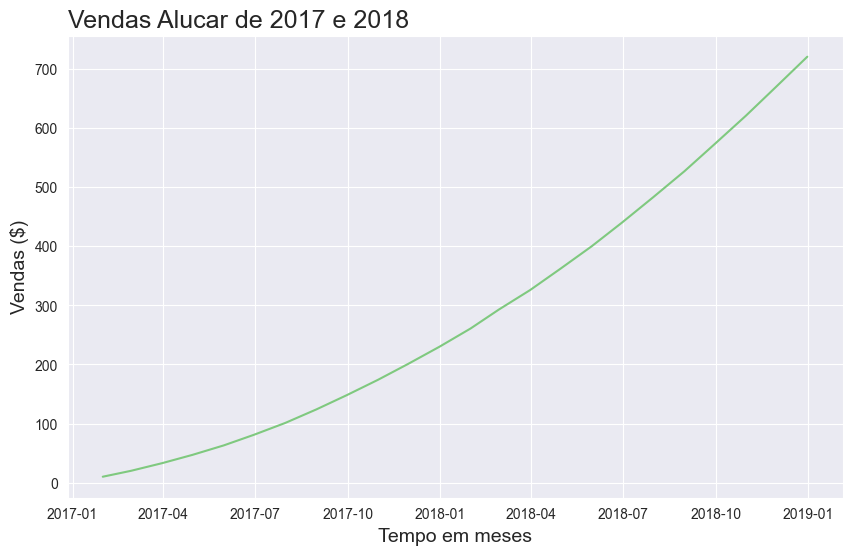

In [9]:
print('Melhorando o gráfico')
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar);
ax.figure.set_size_inches(10, 6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo em meses', fontsize=14)
ax.set_ylabel('Vendas ($)', fontsize=14)
ax = ax

## Decomposição

In [10]:
# O quanto aumentou de um mês para o outro
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


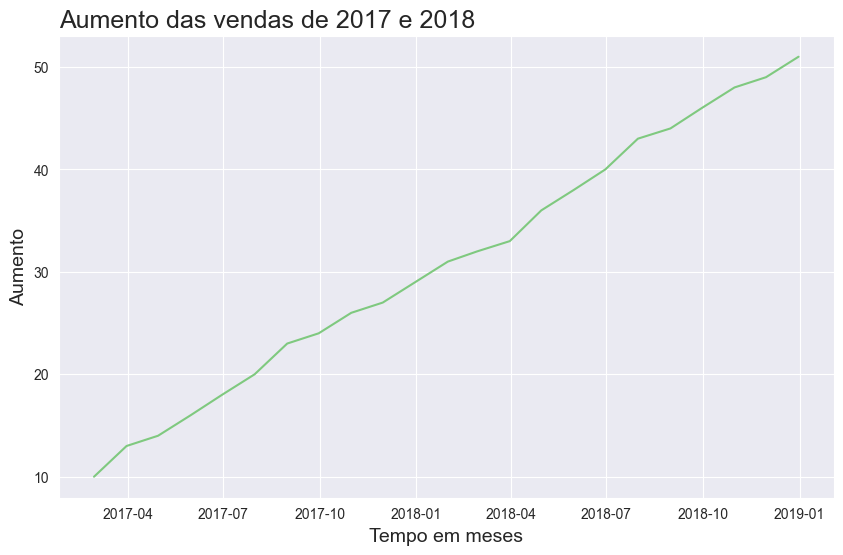

In [11]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar);
ax.figure.set_size_inches(10, 6)
ax.set_title('Aumento das vendas de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo em meses', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

In [12]:
def plotar(titulo, xlabel, ylabel, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset);
    ax.figure.set_size_inches(10, 6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax = ax

In [13]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


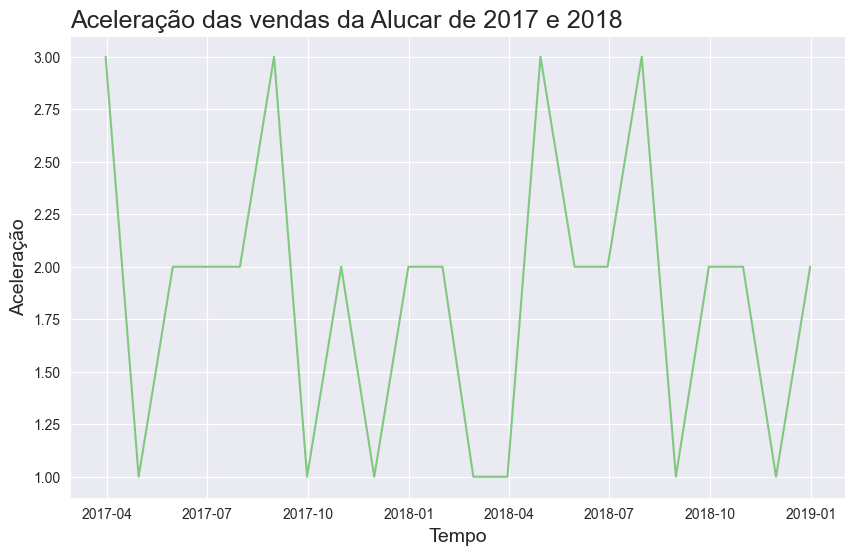

In [14]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 
      'mes', 'aceleracao', alucar)

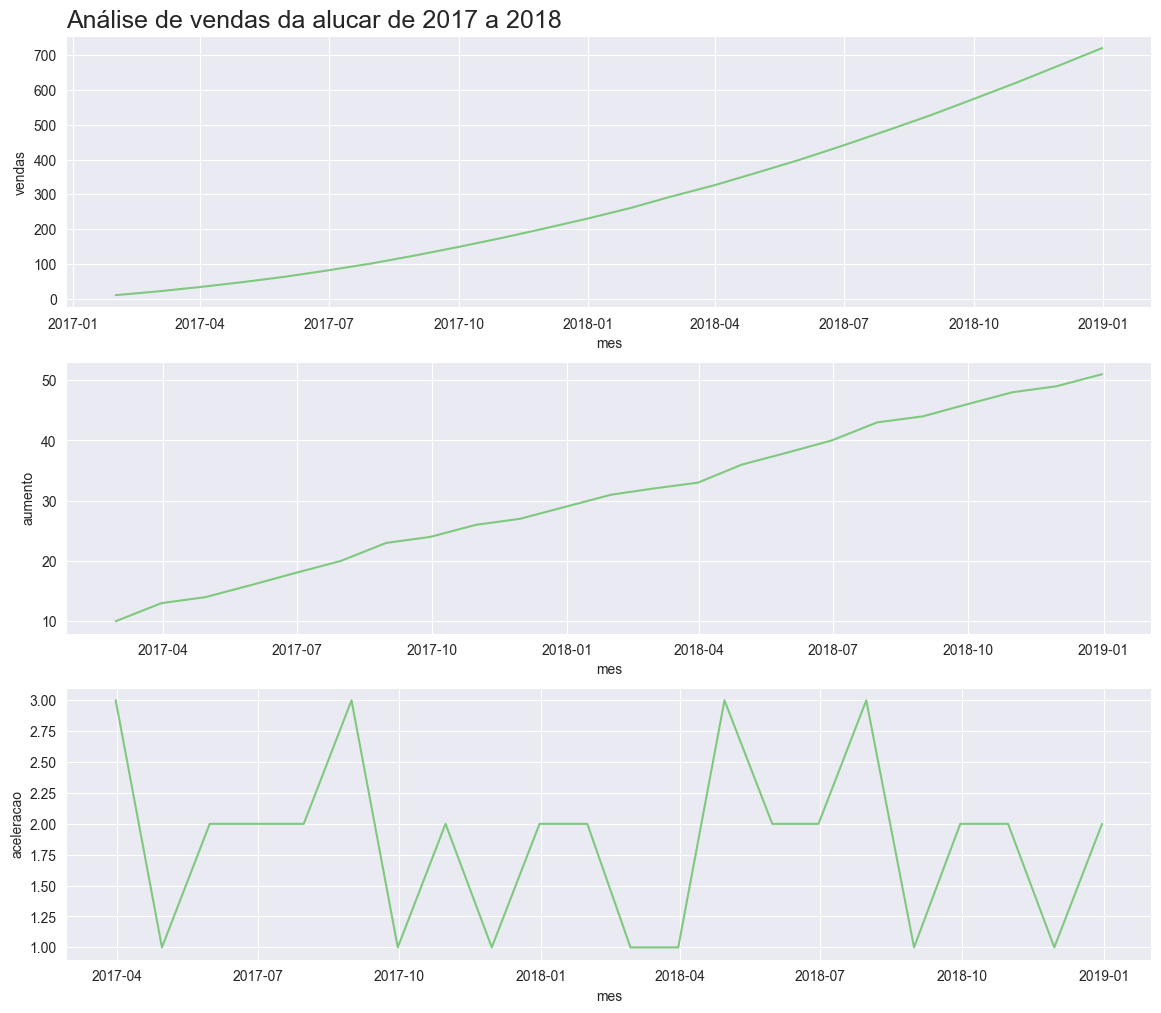

In [15]:
plt.figure(figsize=(14,12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise de vendas da alucar de 2017 a 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3, 1, 2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3, 1, 3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [16]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(14,12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3, 1, 2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3, 1, 3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax

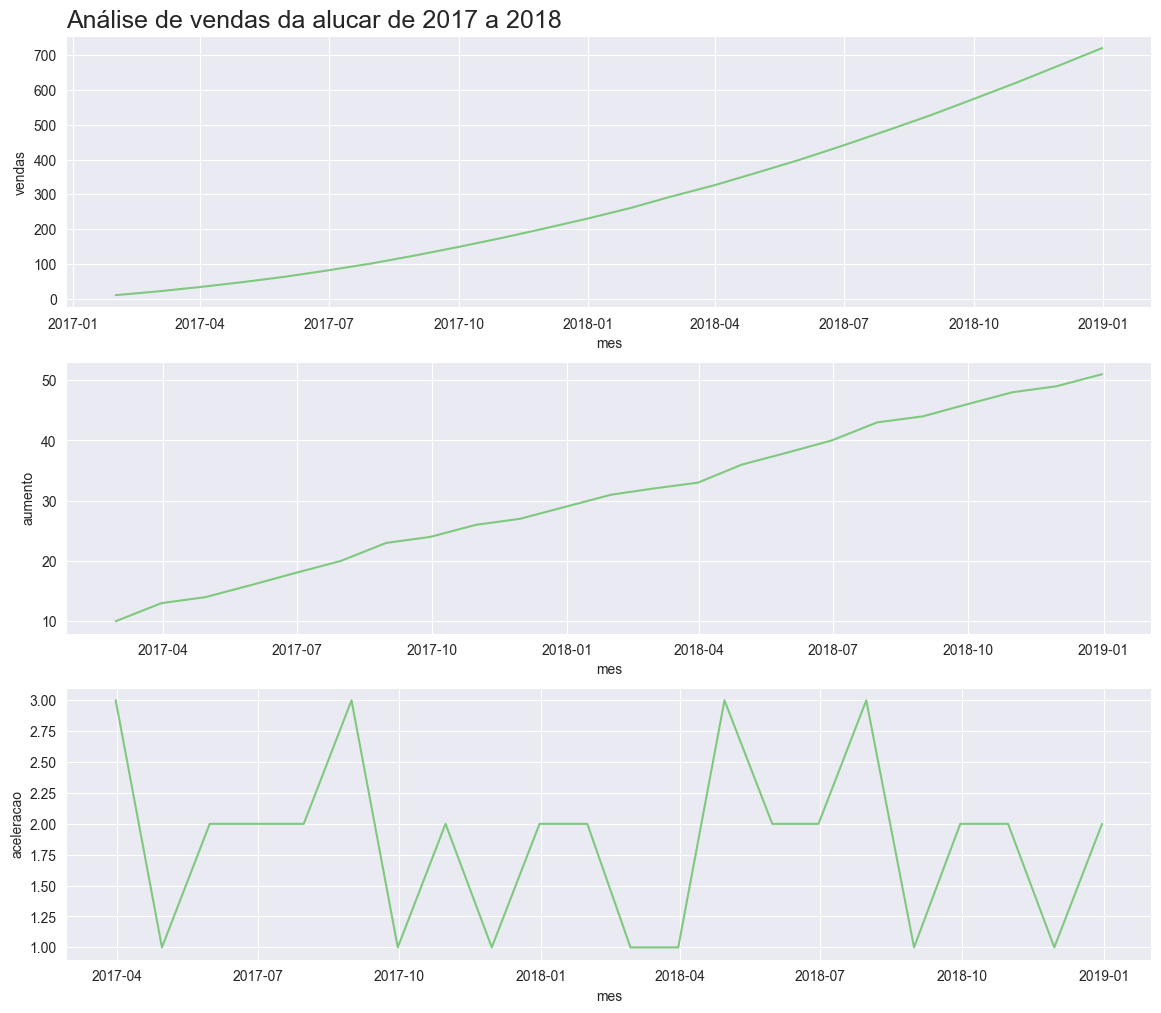

In [17]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise de vendas da alucar de 2017 a 2018')

## Autocorrelação

In [18]:
from pandas.plotting import autocorrelation_plot

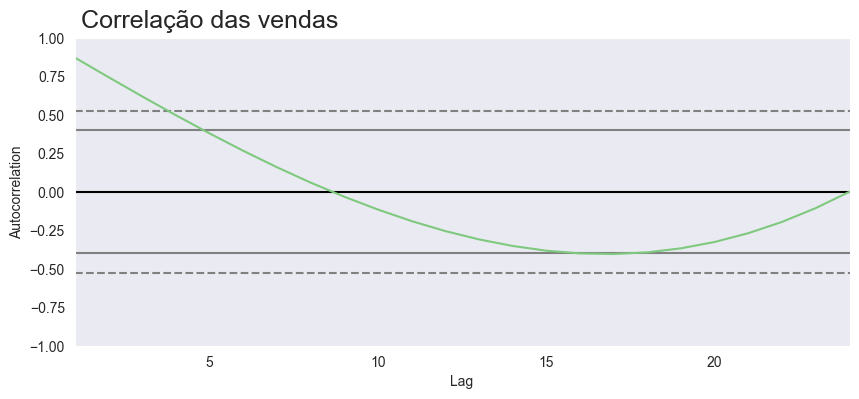

In [19]:
plt.figure(figsize=(10,4))
plt.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar.vendas);

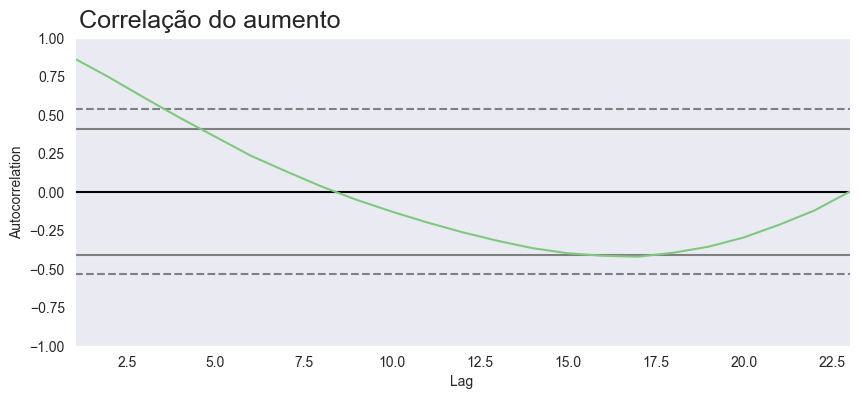

In [20]:
plt.figure(figsize=(10,4))
plt.suptitle('Correlação do aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar.aumento[1:]);

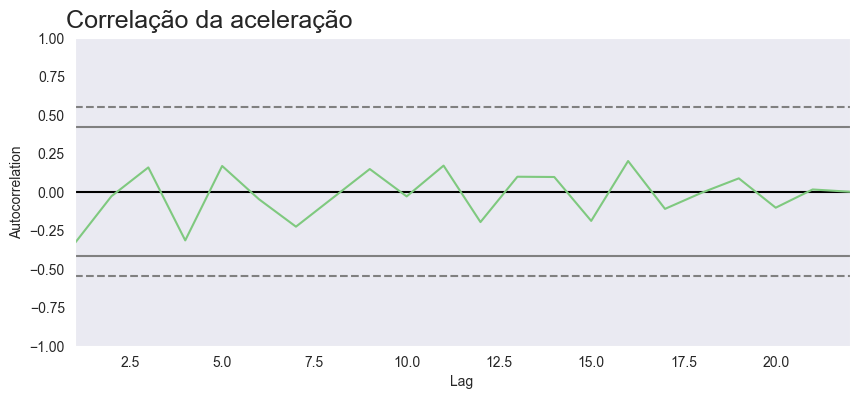

In [21]:
plt.figure(figsize=(10,4))
plt.suptitle('Correlação da aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar.aceleracao[2:]);

## Analisando assinantes da newsletter

In [22]:
assinantes = pd.read_csv('data/newsletter_alucar.csv')

In [23]:
print(f'Quantidades de linhas e colunas: {assinantes.shape}')
print(f'Dados nulos: {assinantes.isna().sum().sum()}')

Quantidades de linhas e colunas: (24, 2)
Dados nulos: 0


In [24]:
print('Alterando "mês" para datetime64')
assinantes['mes'] = pd.to_datetime(assinantes.mes)

Alterando "mês" para datetime64


In [25]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [26]:
print('Criação das colunas "aumento" e "aceleracao"')
assinantes['aumento'] = assinantes.assinantes.diff()
assinantes['aceleracao'] = assinantes.aumento.diff()

Criação das colunas "aumento" e "aceleracao"


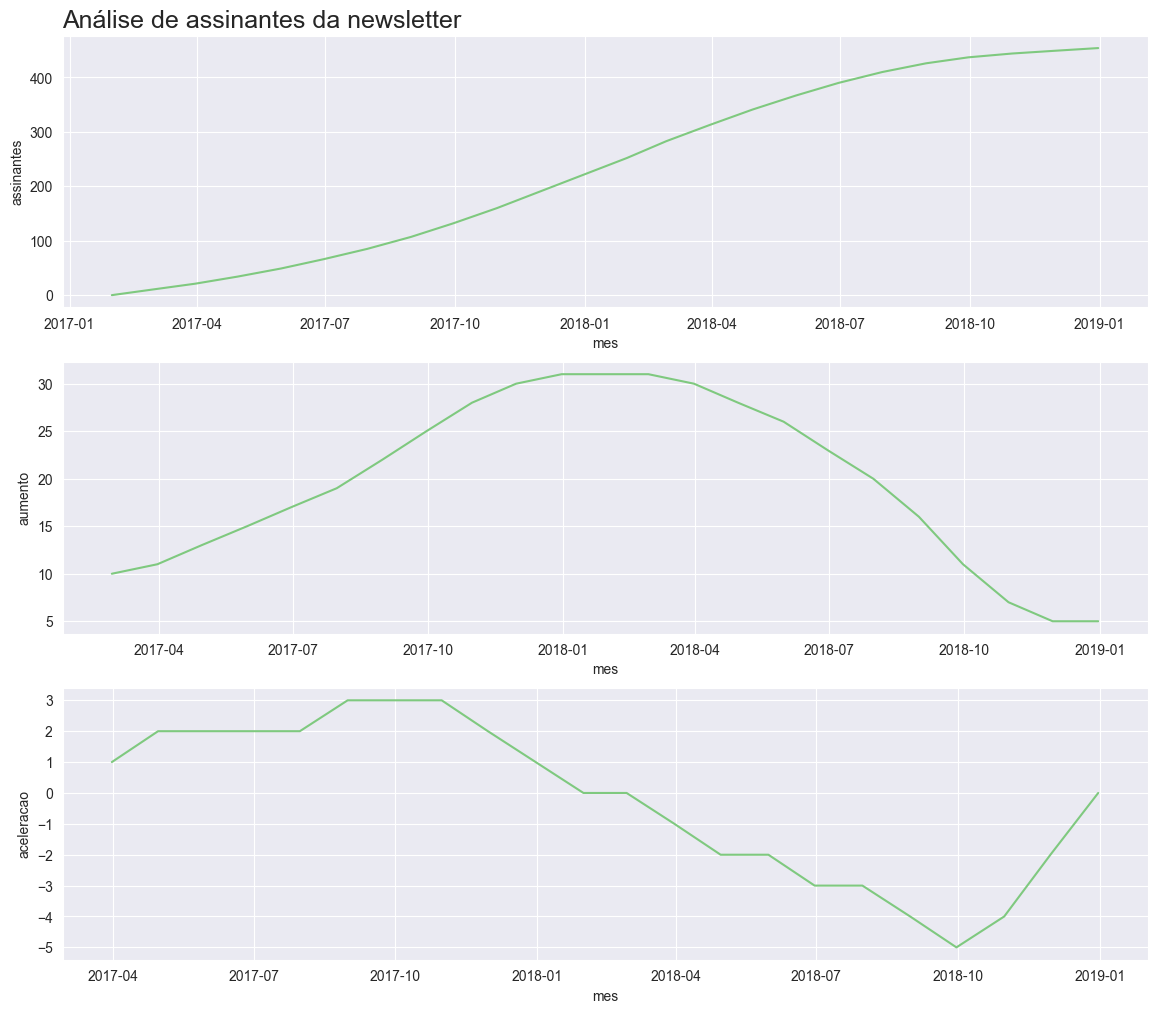

In [27]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da newsletter')

## Analisando - Chocolura

In [28]:
chocolura = pd.read_csv('data/chocolura.csv')

In [29]:
print(f'Quantidades de linhas e colunas: {chocolura.shape}')
print(f'Dados nulos: {chocolura.isna().sum().sum()}')

Quantidades de linhas e colunas: (24, 2)
Dados nulos: 0


In [30]:
chocolura['mes'] = pd.to_datetime(chocolura.mes)

In [31]:
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [32]:
chocolura['aumento'] = chocolura.vendas.diff()
chocolura['aceleracao'] = chocolura.aumento.diff()

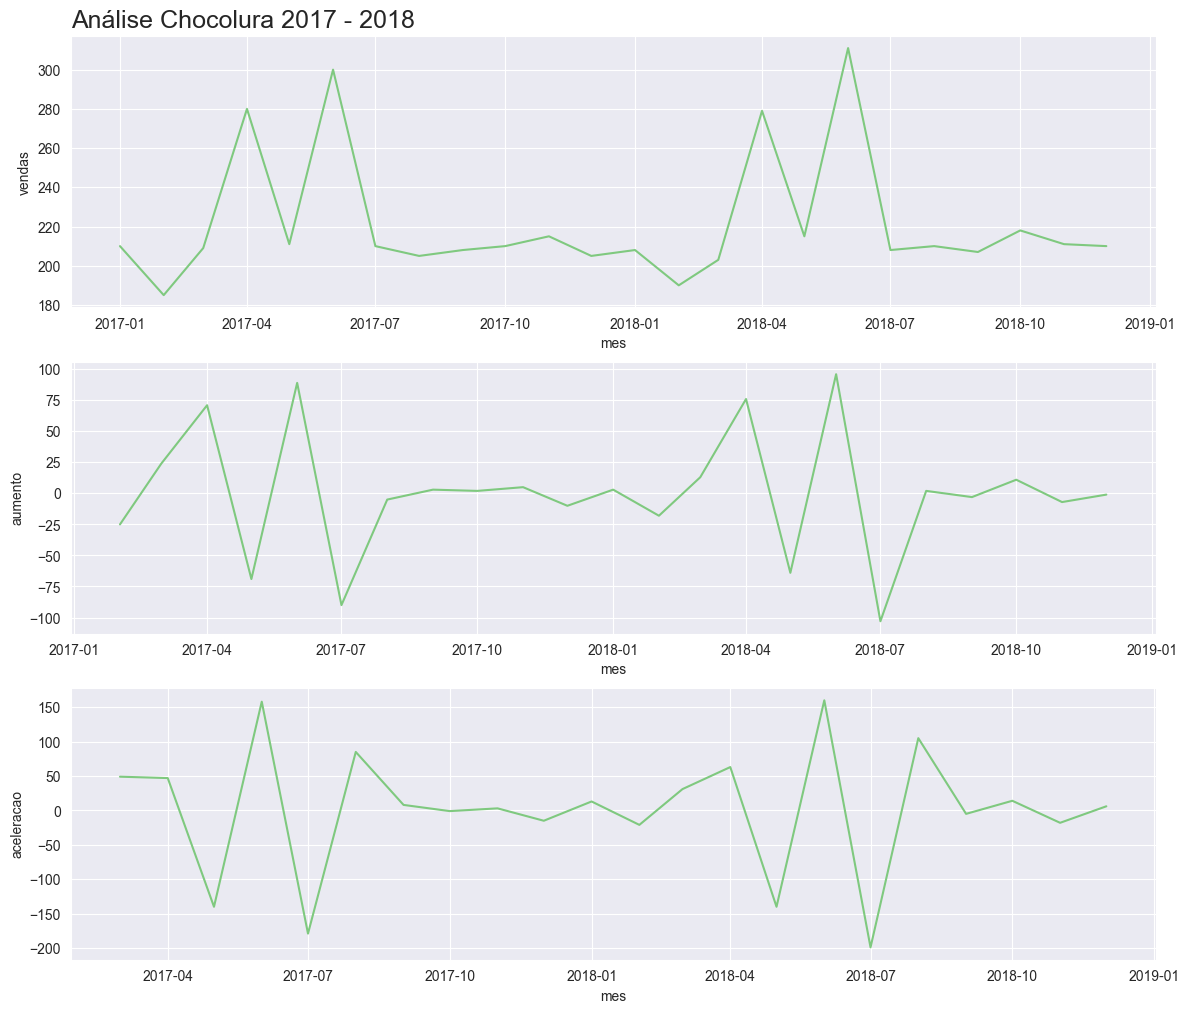

In [33]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise Chocolura 2017 - 2018')

## Chocolura - vendas diárias (outubro e novembro)

In [34]:
vendas_dia = pd.read_csv('data/vendas_por_dia.csv')
vendas_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [35]:
print(f'Quantidades de linhas e colunas: {vendas_dia.shape}')
print(f'Dados nulos: {vendas_dia.isna().sum().sum()}')

Quantidades de linhas e colunas: (61, 2)
Dados nulos: 0


In [36]:
vendas_dia.dtypes

dia       object
vendas     int64
dtype: object

In [37]:
vendas_dia['dia'] = pd.to_datetime(vendas_dia['dia'])
vendas_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [38]:
vendas_dia['aumento'] = vendas_dia['vendas'].diff()
vendas_dia['aceleracao'] = vendas_dia['aumento'].diff()
vendas_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


In [39]:
vendas_dia.columns

Index(['dia', 'vendas', 'aumento', 'aceleracao'], dtype='object')

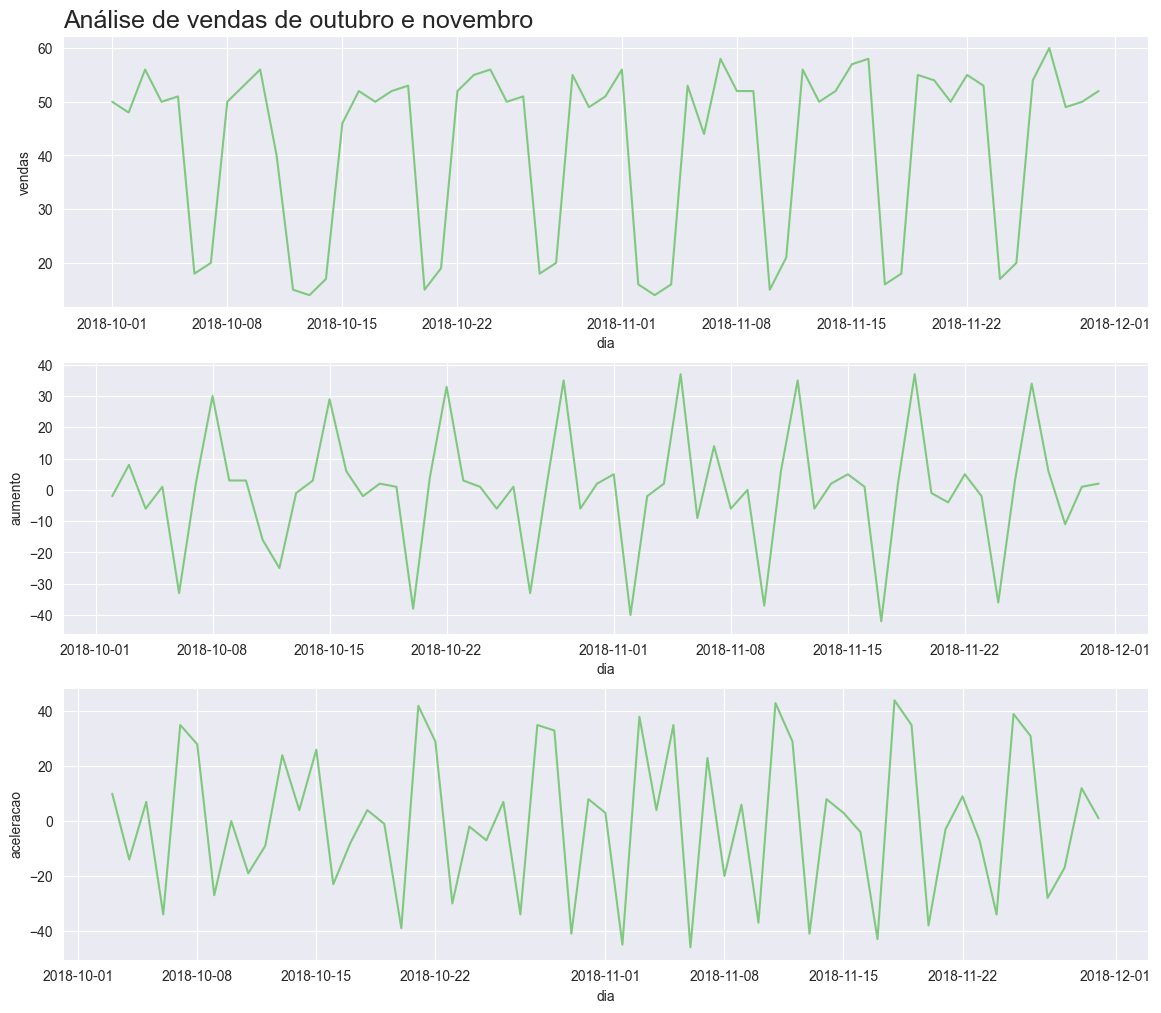

In [40]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_dia, 'Análise de vendas de outubro e novembro')

## Analisando a sazonalidade

In [41]:
vendas_dia['dia_semana'] = vendas_dia['dia'].dt.day_name()

In [42]:
vendas_dia.head(6)

,dia,vendas,aumento,aceleracao,dia_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday


In [43]:
vendas_dia.dia_semana.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [44]:
print('Traduzindo os dados')
dia_traducao = {'Monday': 'segunda',
                'Tuesday': 'terca',
                'Wednesday': 'quarta',
                'Thursday':'quinta', 
                'Friday':'sexta', 
                'Saturday':'sabado',
                'Sunday': 'domingo'}

Traduzindo os dados


In [45]:
vendas_dia['dia_semana'] = vendas_dia['dia_semana'].map(dia_traducao)

### Agrupando as vendas por dias

In [46]:
vendas_agrupadas = vendas_dia.groupby('dia_semana')[['vendas', 'aumento', 'aceleracao']].mean().round()
vendas_agrupadas

,vendas,aumento,aceleracao
dia_semana,,,
domingo,19.0,3.0,31.0
quarta,53.0,1.0,2.0
quinta,51.0,-2.0,-3.0
sabado,16.0,-28.0,-20.0
segunda,52.0,34.0,31.0
sexta,45.0,-7.0,-5.0
terca,52.0,-1.0,-34.0


## Correlação das vendas diárias

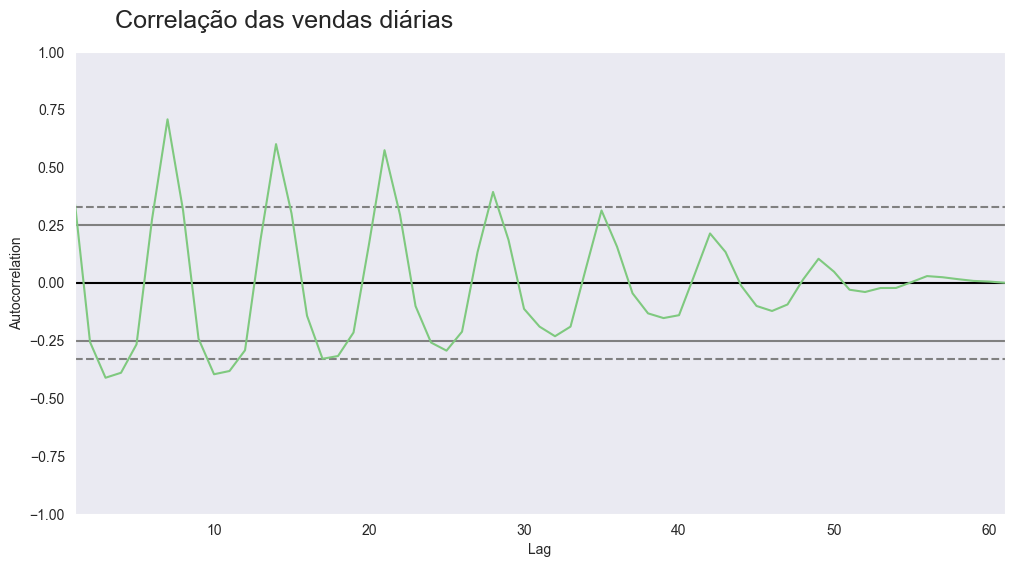

In [47]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_dia['vendas'])
ax = ax

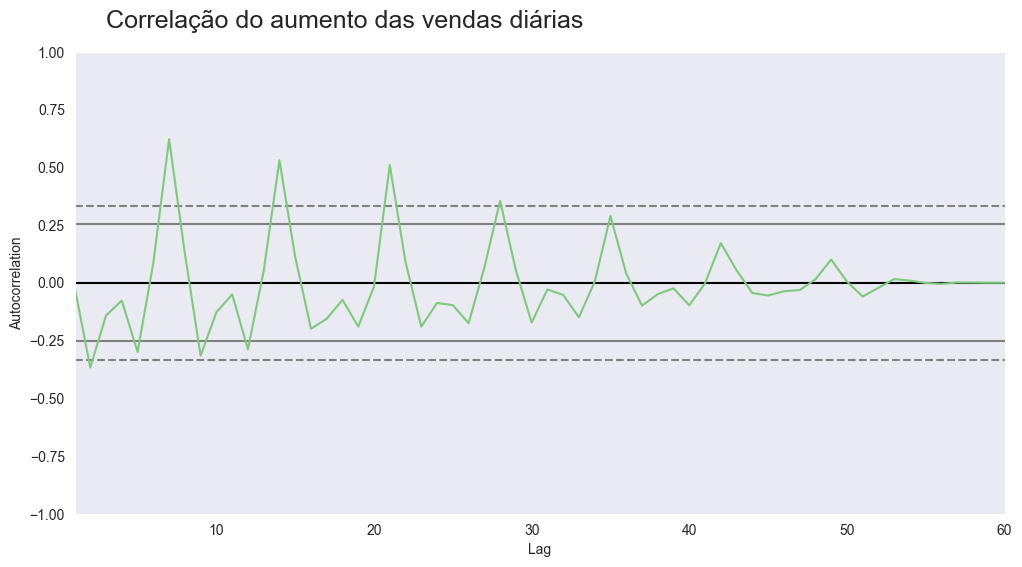

In [48]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_dia['aumento'][1:])
ax = ax

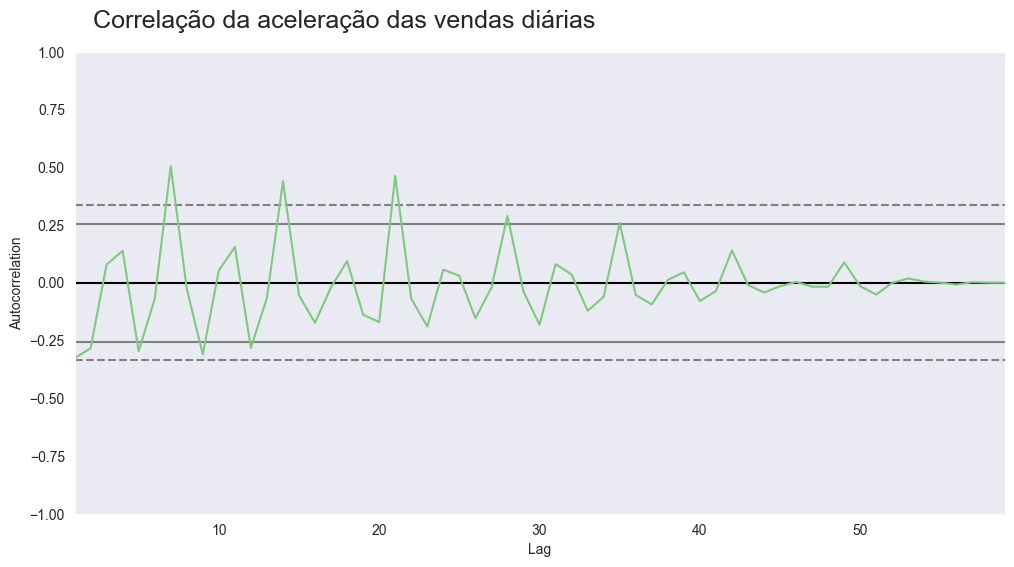

In [49]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_dia['aceleracao'][2:])
ax = ax

## Cafelura - An-alise de vendas

In [50]:
cafelura = pd.read_csv('data/cafelura.csv')

In [51]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [52]:
print(f'Quantidade de linhas e colunas: {cafelura.shape}')
print(f'Dados nulos: {cafelura.isna().sum().sum()}')

Quantidade de linhas e colunas: (24, 2)
Dados nulos: 0


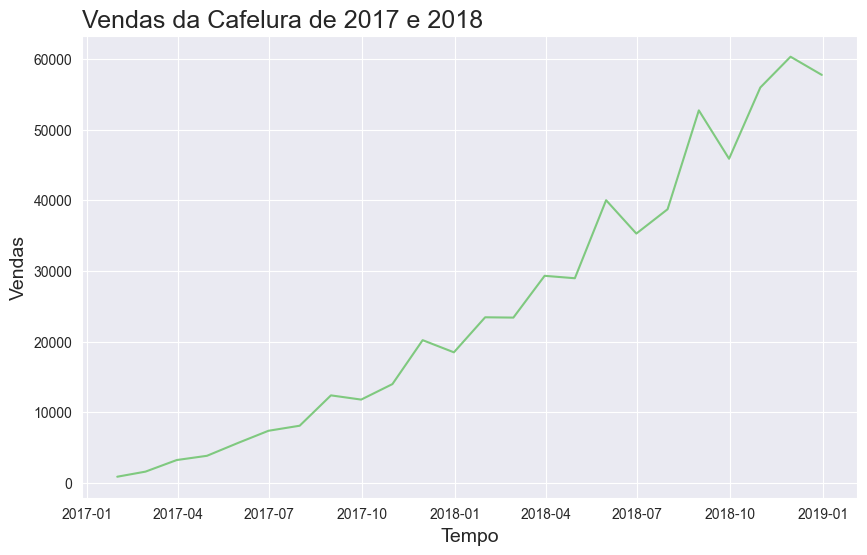

In [53]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [54]:
qtd_dias_fds = pd.read_csv('data/dias_final_de_semana.csv')

In [55]:
qtd_dias_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [56]:
cafelura['vendas_normalizadas'] = cafelura.vendas / qtd_dias_fds['quantidade_de_dias'].values

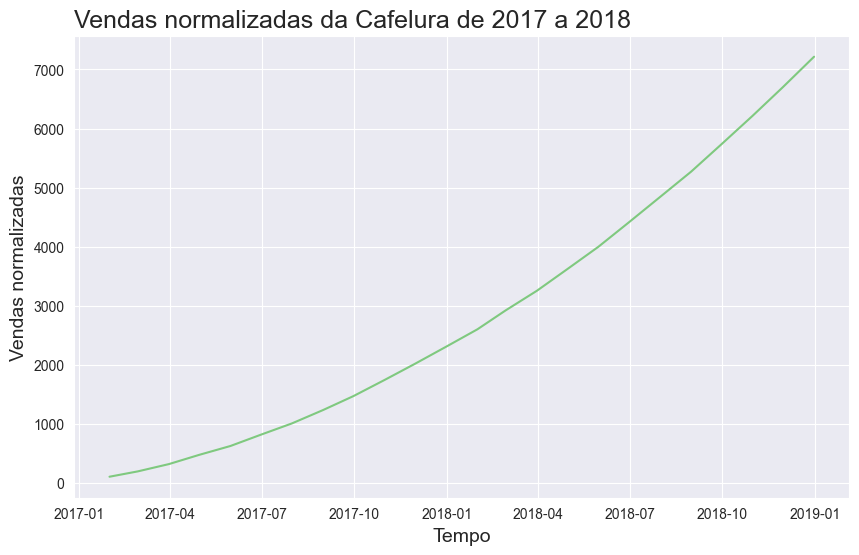

In [57]:
plotar('Vendas normalizadas da Cafelura de 2017 a 2018', 'Tempo', 
       'Vendas normalizadas', 'mes', 'vendas_normalizadas', cafelura)

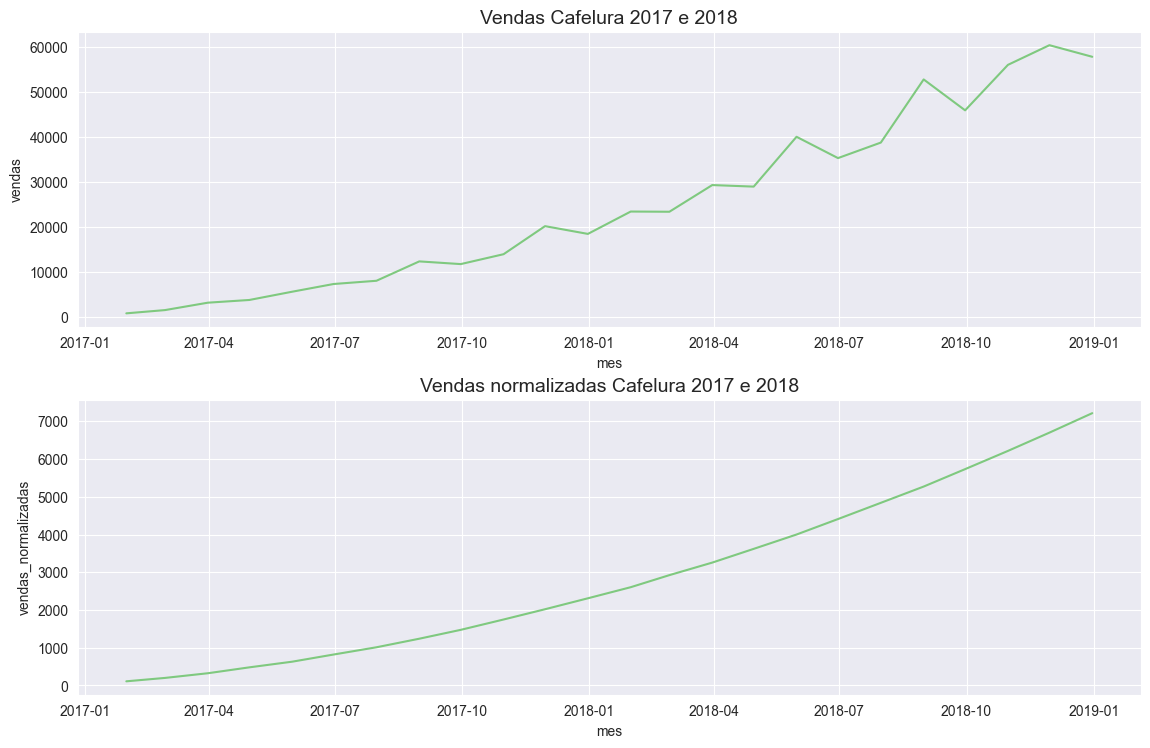

In [58]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(2, 1, 1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=14)
sns.lineplot(x='mes', y='vendas', data=cafelura)
plt.tight_layout(pad=2.5) # não tinha na aula
ax = plt.subplot(2, 1, 2)
ax.set_title('Vendas normalizadas Cafelura 2017 e 2018', fontsize=14)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
plt.subplots_adjust(bottom=0.1);

# Statsmodels

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose

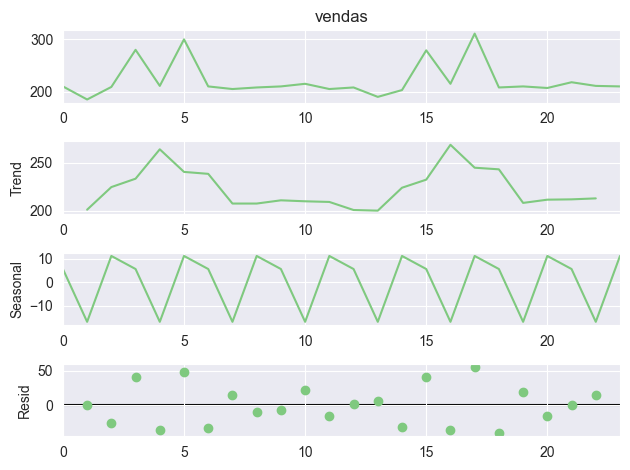

In [60]:
resultado = seasonal_decompose(chocolura['vendas'], period=3)
ax = resultado.plot()

In [61]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [62]:
data = ({
    'observacao': observacao,
    'tendencia': tendencia,
    'sazonalidade': sazonalidade,
    'ruido' :ruido    
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


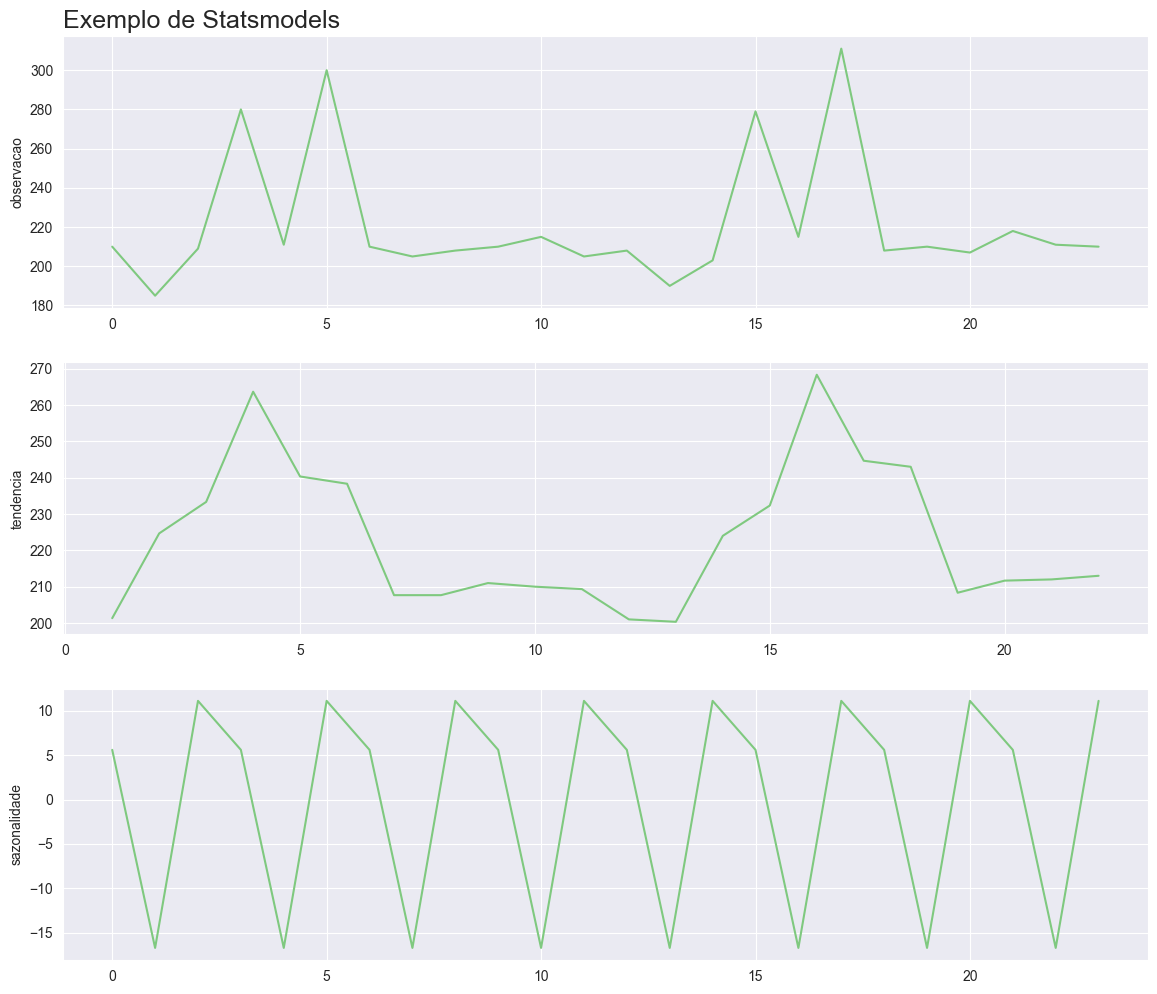

In [63]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado,
               'Exemplo de Statsmodels')

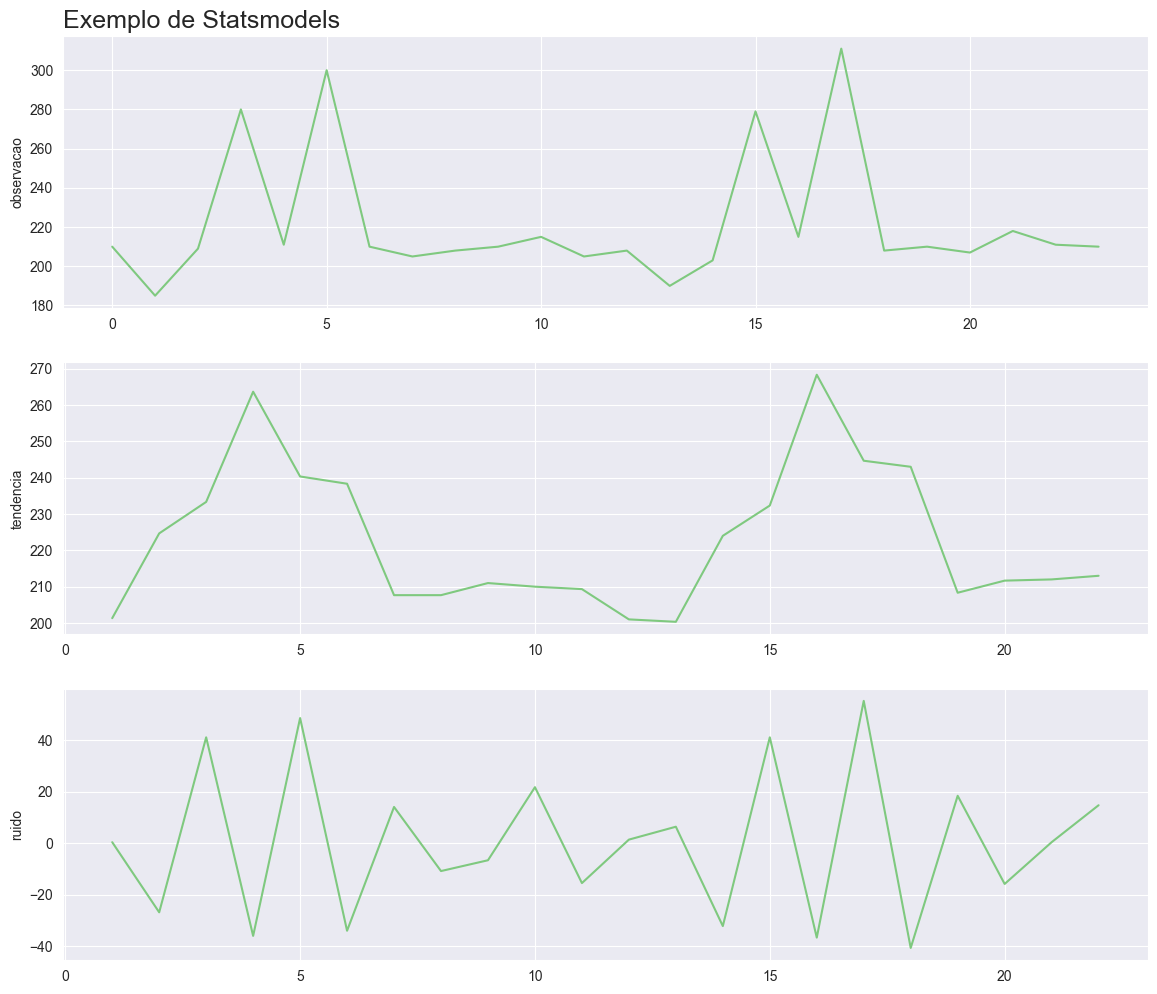

In [64]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'ruido', resultado,
               'Exemplo de Statsmodels')

## Alucel - análise de vendas

In [65]:
alucel = pd.read_csv('data/alucel.csv')

In [69]:
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [66]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [67]:
alucel['dia']=pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [73]:
print('Quantidades de linhas e colunas: ', alucel.shape)
print('Quantidades de dados nulos: ', alucel.isna().sum().sum())

Quantidades de linhas e colunas:  (61, 2)
Quantidades de dados nulos:  0


In [74]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()

In [75]:
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


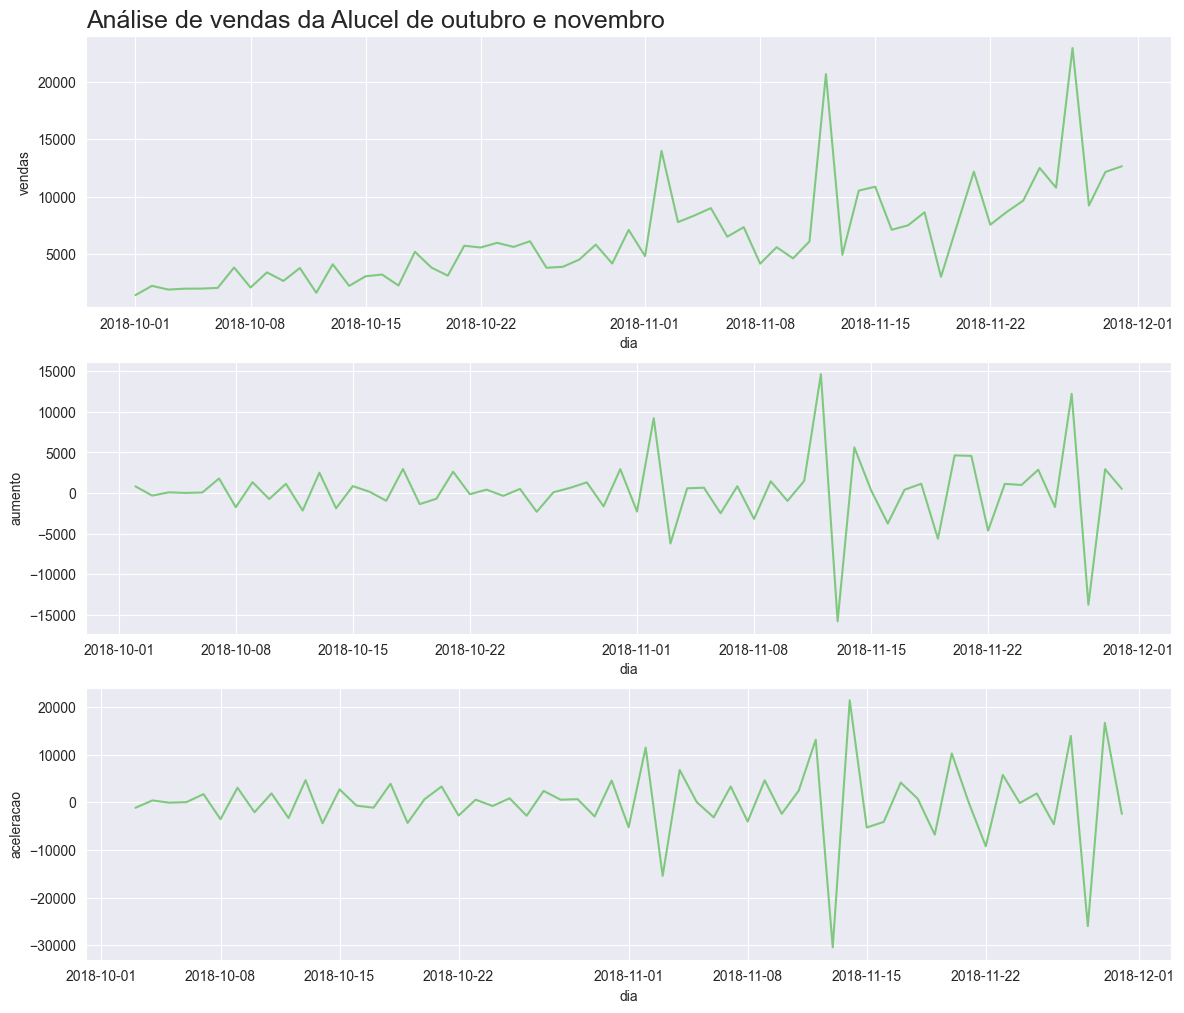

In [77]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', 
                alucel, 'Análise de vendas da Alucel de outubro e novembro')

## Média móvel

In [78]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()
# rolling(7) = média após 7 dias

In [80]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


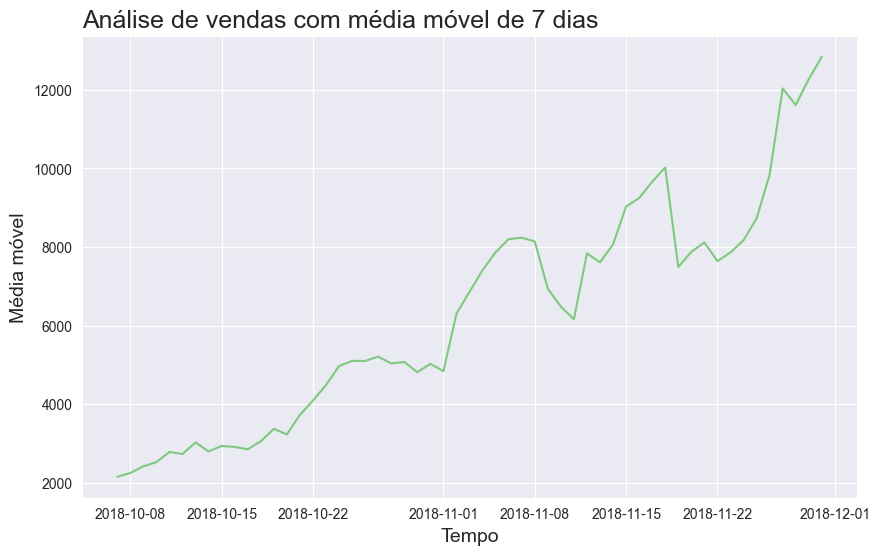

In [81]:
plotar('Análise de vendas com média móvel de 7 dias',
      'Tempo', 'Média móvel', 'dia', 'media_movel', alucel)

In [82]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

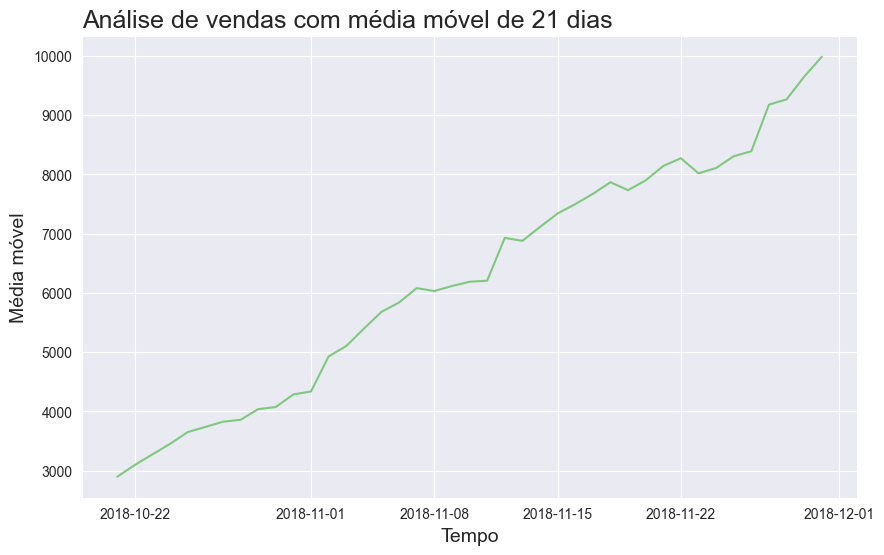

In [83]:
plotar('Análise de vendas com média móvel de 21 dias',
      'Tempo', 'Média móvel', 'dia', 'media_movel_21', alucel)

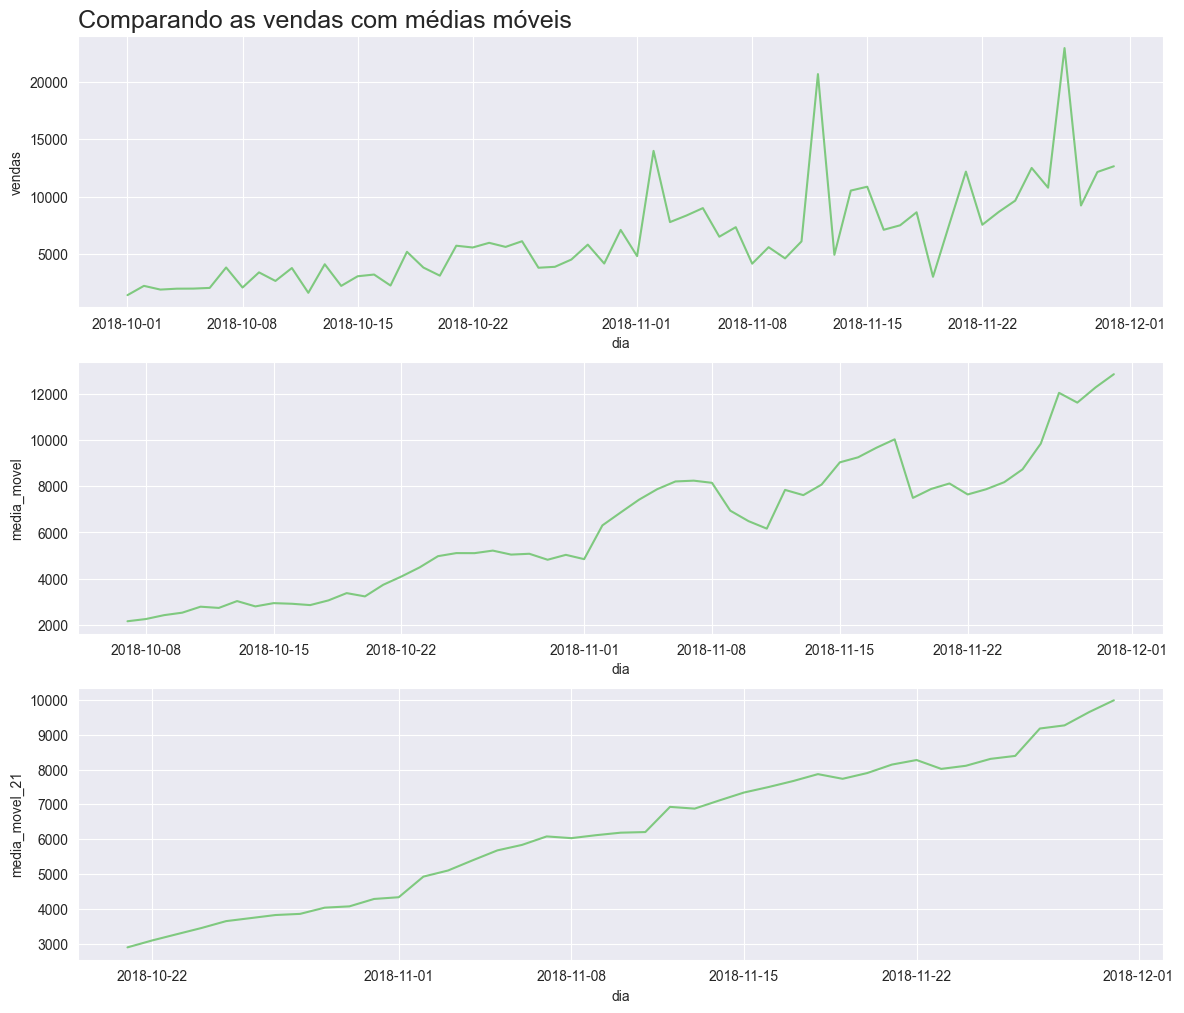

In [87]:
plot_comparacao('dia', 'vendas', 'media_movel', 
                'media_movel_21', alucel, 'Comparando as vendas com médias móveis')